# Math 164 Steepest Descent
### Memphis Lau
### UID: 005721923

### Mathematical Concept

For this project, I will use the steepest descent algorithm, which uses a function's gradient and a specially chosen $\alpha$, which changes at every iteration, to find a minimizer. One property of the steepest descent method is that the difference between two consecutive steps is orthogonal to the difference between the next two consecutive steps, i.e. $x^{(k+1)} - x^{(k)}$ is orthogonal to $x^{(k+2)} - x^{(k+1)}$ for all k.

In the steepest descent algorithm, we update $x^{(k+1)} = x^{k} - \alpha_k \nabla f(x^{(k)})$ until we reach the true minimizer, get close enough to some given error, or hit the number of max iterations. The formula for $\alpha_k$ here is $argmin_{\alpha \ge 0} f(x^{(k)} - \alpha \nabla f(x^{(k)}))$. This $\alpha_k$ is chosen to achieve the maximum amount of decrease of the objective function at each step. When the objective function is a quadratic function, i.e. in the form $f(x) = \frac{1}{2} x^TQx - b^Tx$, the formula for $\alpha_k$ is given by 
$\alpha_k = \frac{g^{(k)T}g^{(k)}}{g^{(k)T}Qg^{(k)}}$, where $g^{(k)}$ represents $\nabla f(x^{(k)})$.

The objective function given here is $f(x,y,z) = \frac{3}{2} x^2 + 2y^2 + \frac{3}{2} z^2 + xz + 2yz - 3x - z$. We can rewrite this as the quadratic function $f(\tilde{x}) = \frac{1}{2} \tilde{x}^T 
\begin{bmatrix} 
    3 & 0 & 1 \\
    0 & 4 & 2 \\
    1 & 2 & 3
\end{bmatrix} 
\tilde{x} - \begin{bmatrix} 3\\0\\1 \end{bmatrix}^T \tilde{x}$, where $\tilde{x} = [x, y, z]^T$.

We also calculate that $\nabla f(\tilde{x}) = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \\ \frac{\partial f}{\partial z} \end{bmatrix} = \begin{bmatrix} 3x + z -3 \\ 4y + 2z \\ 3z + x + 2y -1 \end{bmatrix} = Q\tilde{x} - b$

Due to our knowledge of quadratic formulas, we know the true solution $x^{*}$ is $Q^{-1}b$, which equals $\begin{bmatrix} 
    3 & 0 & 1 \\
    0 & 4 & 2 \\
    1 & 2 & 3
\end{bmatrix}^{-1} \begin{bmatrix} 3\\0\\1 \end{bmatrix} = \begin{bmatrix} 1\\0\\0 \end{bmatrix}$
We can use this to calculate error.

Now we have everything we need to code the algorithm.

### Code

In [1]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# initialize x0
x0 = np.matrix([0,0,0]).T

# define hyperparameters
num_iterations = 1000000
tolerance = 10**(-6)

# define objective function. These lines can be changed to run this code for different objective functions
Q = np.matrix([[3,0,1],[0,4,2],[1,2,3]])
b = np.matrix([3,0,1]).T

# Find x_star for error calculations
x_star = np.matmul(np.linalg.inv(Q), b)

In [3]:
# function for finding gradient of f at x
def find_gradient(Q, b, x):
    return np.matmul(Q,x) - b

In [4]:
# function for finding alpha_k
def find_alpha(g, Q):
    numerator = np.matmul(g.T,g)
    denominator = np.matmul(np.matmul(g.T,Q), g)
    return numerator / denominator

In [64]:
# function for finding error using solution
def find_error(x_k):
    numerator = np.sqrt(sum(np.square(x_k - x_star)))
    denominator = np.sqrt(sum(np.square(x_star)))
    return numerator / denominator

In [68]:
# initialize error array for plotting later
err = np.array([1])

# initialize a counter variable i as 1
i = 1

# initialize xk as x0 for now
x_k = x0

# run code until either error is less than tolerance or we reach max iterations
while err[i-1] > tolerance and i < num_iterations:
    # find gradient
    gradient = find_gradient(Q, b, x_k)
    # find optimal alpha
    alpha = find_alpha(gradient, Q)
    # update
    x_kp1 = x_k - alpha.item() * gradient
    # calculate and store error
    err = np.append(err, find_error(x_kp1))
    # change xk to be x(k+1)
    x_k = x_kp1
    # increment i and run through loop again
    i += 1

When we use the error function with the solution, the algorithm reaches a point close enough to the trun solution after 32 iterations, ending with a solution $\tilde{x} = \begin{bmatrix} 0.9999997\\0.00000002 \\ 0.0000007 \end{bmatrix}$

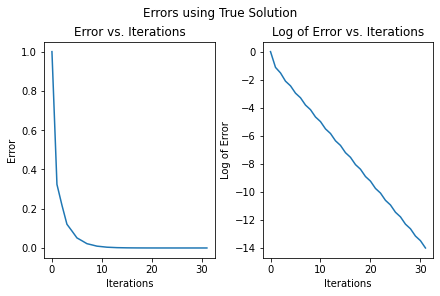

In [73]:
fig,ax= plt.subplots(1,2, constrained_layout = True)
plt.subplot(1,2,1)
plt.plot(range(0,len(err)), err)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations')
plt.subplot(1,2,2)
plt.plot(range(0,len(err)), np.log(err))
plt.xlabel('Iterations')
plt.ylabel('Log of Error')
plt.title('Log of Error vs. Iterations')
fig.suptitle('Errors using True Solution')
plt.show()

Now, in practice, we typically do not know the true solution $x^*$, so I will run this code again but with the second error function, which relies only on $x^{(k+1)}$ and $x^{(k)}$.

In [65]:
# function for finding error if we did not have solution
# We will use ||x(k+1) - x(k)|| / ||x(k)||
def find_error2(x_kp1, x_k):
    difference = x_kp1 - x_k
    difference_square = np.square(difference)
    numerator = np.sqrt(sum(difference_square))
    denominator = np.sqrt(sum(np.square(x_k)))
    return numerator / denominator

In [81]:
i = 1
grad1 = find_gradient(Q,b,x0)
alpha1 = find_alpha(grad1, Q)
x_1 = x0 - alpha1.item() * grad1
err = np.array([10])
x_k = x_1
while err[i-1] > tolerance and i < num_iterations:
    gradient = find_gradient(Q, b, x_k)
    alpha = find_alpha(gradient, Q)
    x_kp1 = x_k - alpha.item() * gradient
    err = np.append(err, find_error2(x_kp1,x_k))
    x_k = x_kp1
    i += 1

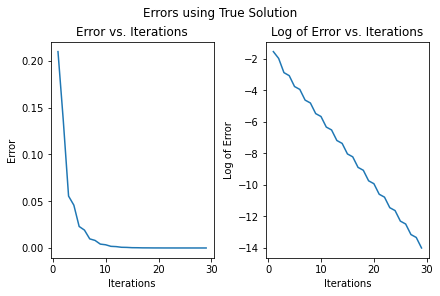

In [88]:
fig,ax= plt.subplots(1,2, constrained_layout = True)
plt.subplot(1,2,1)
plt.plot(range(1,len(err)), err[1:])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations')
plt.subplot(1,2,2)
plt.plot(range(1,len(err)), np.log(err[1:]))
plt.xlabel('Iterations')
plt.ylabel('Log of Error')
plt.title('Log of Error vs. Iterations')
fig.suptitle('Errors using True Solution')
plt.show()

As we can see from comparing the plots, using the new error function that does not depend on the true solution, the algorithm can still reach a close enough minimizer in 30 iterations. The biggest difference is looking at the log of the error, where it appears more jagged than when the error function uses the true solution.